In [1]:
import numpy as np

In [2]:
def diagonality(matrix):
    nbins = matrix.shape[0]
    x = np.tile(np.arange(nbins)+1, nbins)
    y = np.reshape((np.ones((nbins,nbins))*(np.arange(nbins)+1)).T, (nbins**2,))
    cov = np.cov( np.stack((x, y), axis=0), aweights= np.reshape(matrix, (nbins**2,)))

    return cov[0,1] / np.sqrt(cov[0,0] * cov[1,1])

In [3]:
def generate_matrix(resmat):
#    nbins = resmat.shape[0]
    eff = np.sum(resmat, axis=1)
#    matrix = np.random.uniform(0,1,nbins**2)
#    matrix.shape = (nbins, nbins)
    matrix = np.abs( np.random.normal(resmat, resmat) )
    matrix = (matrix.T * eff / np.sum(matrix, axis=1)).T
    return matrix

In [3]:
resmat = np.array([
    [ 5.467058118737028e-06, 7.85700845365062e-06, 2.3048969168730623e-06, 1.2793930093490808e-07 ],
    [ 1.2230102045431043e-06, 1.5657836352845326e-05, 8.562169815249333e-06, 5.203917680089867e-07 ],
    [ 3.5229108113972104e-07, 8.881298108116627e-06, 1.608200646012806e-05, 1.5897931759550747e-06 ],
    [ 1.0788243328012291e-07, 3.1733972650711483e-06, 1.0273123134848092e-05, 6.360727210688817e-06 ]
]
)

#resmat = np.array([
#    [ 3.5382596157519194e-06, 4.314830191150084e-06, 2.039916500920407e-06, 1.5583288408122874e-06, 1.0844070705952636e-06, 5.323714929606162e-07, 2.2795401176275395e-07, 2.8453398329373752e-08 ],
#    [ 1.2535284897268011e-06, 6.336111988022054e-06, 5.041029236430538e-06, 3.4879472583052294e-06, 2.210595626998393e-06, 1.021249489965105e-06, 4.3452910493446935e-07, 6.837847149685528e-08 ],
#    [ 4.075699630754141e-07, 3.279846156965161e-06, 7.107592566338172e-06, 6.970694547769966e-06, 4.057231829296177e-06, 1.7337311227405394e-06, 7.941132819609926e-07, 1.492333584422514e-07 ],
#    [ 1.9310578755871307e-07, 1.3930205176266248e-06, 4.109217928628303e-06, 1.0576586691532556e-05, 7.927255848668552e-06, 2.8199268112859285e-06, 1.2691890929339134e-06, 2.601777102172096e-07 ],
#    [ 1.3946978164696352e-07, 8.956556872177922e-07, 2.448082924472611e-06, 8.147616773773378e-06, 1.0502249894981353e-05, 4.3955581600134515e-06, 1.8751499586715644e-06, 3.814718182688438e-07 ],
#    [ 1.1605707249690354e-07, 6.632021117155579e-07, 1.7094141538991512e-06, 4.708434785939983e-06, 7.3510532190028245e-06, 6.752625638384484e-06, 3.577961290927687e-06, 6.729440309094387e-07 ],
#    [ 6.575160455495625e-08, 3.821867919884499e-07, 1.039340625896616e-06, 2.8810086412943684e-06, 4.354791288691953e-06, 5.255903042541472e-06, 6.49016779287647e-06, 1.6378222058993086e-06 ],
#    [ 2.9204291603914594e-08, 1.8889447934148614e-07, 5.999896559690592e-07, 1.951073136161718e-06, 2.9835032428961583e-06, 3.11007081863393e-06, 5.4722406890511095e-06, 4.321626345625182e-06 ]
#]
#)

nominal_diag = diagonality(resmat)
print(nominal_diag)
print(np.linalg.det(resmat))

[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4.]
[[0.68433711 0.51611503]
 [0.51611503 1.18851819]]
0.5722799688810605
4.4379774056102566e-21


In [244]:
nbetter = 0
best_diag = 0

for i in range(50):
    mat = generate_matrix(resmat)
    diag = diagonality(mat)
    if diag > best_diag: 
        best_diag = diag
        best_mat = mat
        print(best_diag)
    if diag > nominal_diag:
        nbetter += 1
        
print(nbetter)
best_mat

0.5170381254473784
0.6140016981274795
0.6229608380023526
0.6649306214495415
0.7117477899967111
16


array([[3.41558899e-06, 6.43028467e-06, 1.39142186e-06, 3.03881720e-08,
        1.55337473e-06, 2.83377641e-07, 2.08760173e-07, 1.13248971e-08],
       [1.52194800e-06, 1.21670736e-05, 1.19375990e-06, 6.63708753e-07,
        2.50447652e-06, 6.37684537e-07, 1.16211899e-06, 2.59937587e-09],
       [4.95135651e-07, 3.35601153e-07, 9.27219146e-06, 7.21897280e-06,
        3.99647825e-06, 2.94658698e-06, 7.89021956e-08, 1.56144346e-07],
       [2.73650672e-07, 1.88106229e-06, 3.26038304e-06, 1.67528564e-05,
        2.68715662e-06, 2.21675444e-06, 9.94219042e-07, 4.82397839e-07],
       [2.38484343e-07, 4.27249189e-07, 2.31113050e-06, 1.41838530e-05,
        4.51018040e-06, 5.25759069e-06, 1.81916462e-06, 3.76023008e-08],
       [1.86108571e-07, 1.84000121e-07, 6.00500343e-07, 3.06120446e-06,
        1.51036623e-05, 2.79780858e-06, 2.85038478e-06, 7.68023166e-07],
       [8.07359260e-08, 1.41312105e-07, 2.06899651e-07, 2.25470911e-06,
        1.22123110e-06, 6.27371761e-06, 1.11087649e-05, 8.

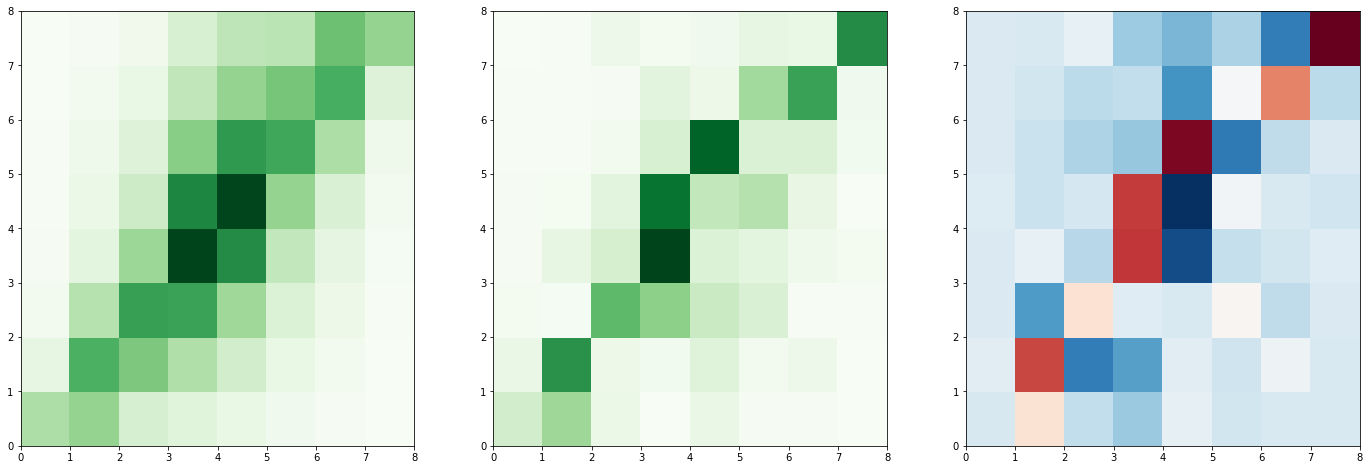

In [258]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3*resmat.shape[1], resmat.shape[0]) )
opts = {'cmap': 'Greens'}
ax[0].pcolor(resmat, **opts)
ax[1].pcolor(best_mat, **opts)
heatmap = ax[2].pcolor(best_mat-resmat, cmap='RdBu_r')
#plt.colorbar(heatmap, ax=ax[2])

In [226]:
truth = np.array([ 294126835.4857675, 1422424481.0558422, 1266978176.0103881, 189877698.82031778 ])
truth@best_mat

array([ 5117.76365506, 45659.18300291, 22216.92507087,  6441.62310002])

In [181]:
truth@resmat

array([ 3814.47773899, 36438.01502927, 35183.16018443,  3999.84187617])

In [227]:
optmat = np.array([
    [ 3.5382596157519194e-06, 4.314830191150084e-06, 2.039916500920407e-06, 1.5583288408122874e-06, 1.0844070705952636e-06, 5.323714929606162e-07, 2.2795401176275395e-07, 2.8453398329373752e-08 ],
    [ 1.2535284897268011e-06, 6.336111988022054e-06, 5.041029236430538e-06, 3.4879472583052294e-06, 2.210595626998393e-06, 1.021249489965105e-06, 4.3452910493446935e-07, 6.837847149685528e-08 ],
    [ 4.075699630754141e-07, 3.279846156965161e-06, 7.107592566338172e-06, 6.970694547769966e-06, 4.057231829296177e-06, 1.7337311227405394e-06, 7.941132819609926e-07, 1.492333584422514e-07 ],
    [ 1.9310578755871307e-07, 1.3930205176266248e-06, 4.109217928628303e-06, 1.0576586691532556e-05, 7.927255848668552e-06, 2.8199268112859285e-06, 1.2691890929339134e-06, 2.601777102172096e-07 ],
    [ 1.3946978164696352e-07, 8.956556872177922e-07, 2.448082924472611e-06, 8.147616773773378e-06, 1.0502249894981353e-05, 4.3955581600134515e-06, 1.8751499586715644e-06, 3.814718182688438e-07 ],
    [ 1.1605707249690354e-07, 6.632021117155579e-07, 1.7094141538991512e-06, 4.708434785939983e-06, 7.3510532190028245e-06, 6.752625638384484e-06, 3.577961290927687e-06, 6.729440309094387e-07 ],
    [ 6.575160455495625e-08, 3.821867919884499e-07, 1.039340625896616e-06, 2.8810086412943684e-06, 4.354791288691953e-06, 5.255903042541472e-06, 6.49016779287647e-06, 1.6378222058993086e-06 ],
    [ 2.9204291603914594e-08, 1.8889447934148614e-07, 5.999896559690592e-07, 1.951073136161718e-06, 2.9835032428961583e-06, 3.11007081863393e-06, 5.4722406890511095e-06, 4.321626345625182e-06 ]
]
)

In [228]:
diagonality(optmat)

0.6088514346163143